In [29]:
import pandas as pd 
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
import gmaps

#api imports
import requests, json
api_key = gkey here

# Configure gmaps
gmaps.configure(api_key=api_key)


In [5]:
data_file = "data/time_series_covid_19_recovered.csv"
recover_df = pd.read_csv(data_file)

In [6]:
china_df = recover_df.loc[(recover_df["Country/Region"] == "Mainland China"), :]

In [7]:
china_df["January"] = china_df["1/31/20"]

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
china_df["February"] = china_df["2/20/20"]

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
china_df["Test"] = china_df["February"] - china_df["January"]

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
china_df = china_df.rename(columns = {"February":"Total","Test":"February"})

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


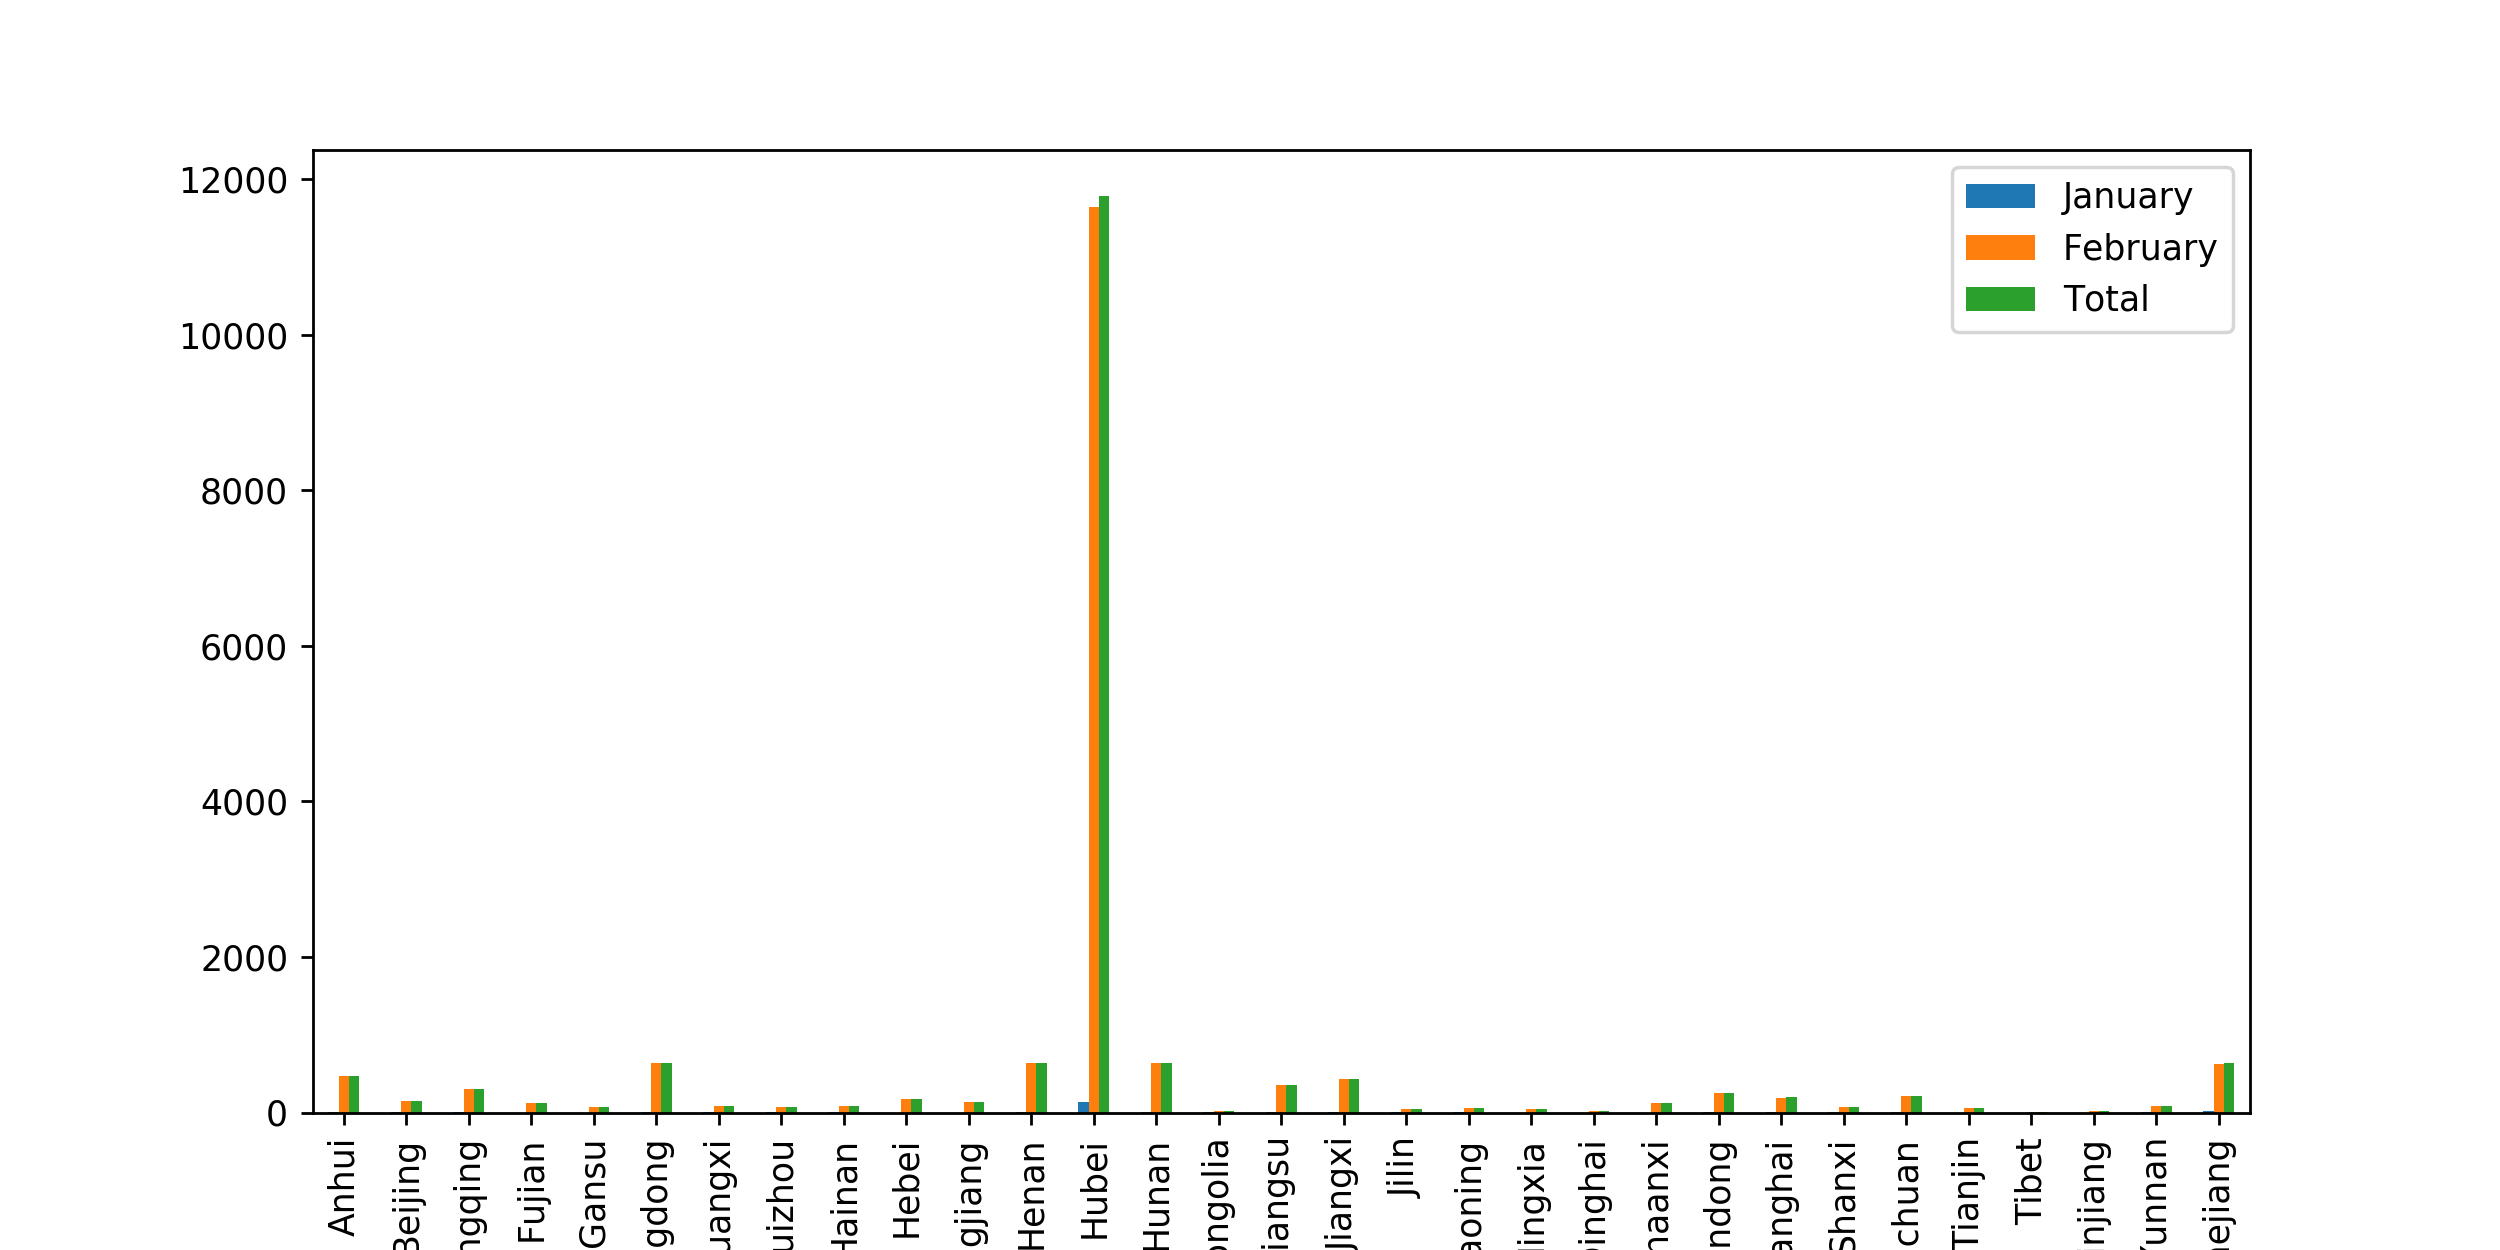

In [11]:
grouped_city = china_df.groupby(["Province/State"])["January","February","Total"].sum()
grouped_city
multi_plot = grouped_city.plot(kind="bar", figsize=(10,5)) 

In [13]:
# # url variable store url 
# url = "https://maps.googleapis.com/maps/api/place/textsearch/json?"

# # The text string on which to search 
# query = input('Search query: ')

# # get method of requests module 
# # return response object 
# r = requests.get(url + 'query=' + query +
#                         '&key=' + api_key) 

# # json method of response object convert 
# #  json format data into python format data 
# x = r.json() 

# # now x contains list of nested dictionaries 
# # we know dictionary contain key value pair 
# # store the value of result key in variable y 
# y = x['results'] 

# # keep looping upto length of y 
# #for i in range(len(y)): 
      
#     # Print value corresponding to the 
#     # 'name' key at the ith index of y 
#     print(y[i]['name']) 
    
    

Search query: Hospitals in the united states
Children's Mercy Hospital Kansas
Saint Luke's Hospital of Kansas City
The University of Kansas Hospital
Belton Regional Medical Center
Saint Luke's Community Hospital - Roeland Park
Children's Mercy Adele Hall Campus
LMH Health
ReDiscover Crisis Center
VA Hospital
Nebraska Medicine Nebraska Medical Center
UMKC Health Sciences District
USA Health University Hospital
Eastern State Hospital
Women's and Children's Hospital
Newman Regional Health
Hospital
IU Health University Hospital
Hospital
United Hospital
USA Children's & Women's Hospital


In [48]:
china_df.columns
china_reduced = china_df[['Province/State','Lat','Long', 'Total']]
china_reduced['Hospital Count'] = ''
china_reduced = china_reduced.sort_values('Total', ascending=False)
china_reduced

china_top_5 = china_reduced.head()
china_top_5

C:\Users\garrettw13\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Province/State,Lat,Long,Total,Hospital Count
12,Hubei,30.97564,112.2707,11788,
5,Guangdong,23.33841,113.4220,642,
11,Henan,33.88202,113.6140,637,
13,Hunan,27.61041,111.7088,634,
30,Zhejiang,29.18251,120.0985,633,


In [21]:

# Store latitude and longitude in locations
locations = china_df[["Lat", "Long"]]
# Fill NaN values and convert to float
Total = china_df["Total"]

In [31]:
fig = gmaps.figure(map_type="HYBRID")
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=Total, 
                                 dissipating=False, max_intensity=500,
                                 point_radius=1)
#plot the figure on gmaps
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
china_df.columns
china_reduced = 

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', 'January', 'Total', 'February'],
      dtype='object')

In [46]:
#using iterrows to iterate through hotels_df dataframe
#for index, row in hotel_df.iterrows():


rowlat = 40.18238
rowlng = 116.41420
location = str(rowlat)+","+ str(rowlng)
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {"location": {location},"radius":1600 ,"type": "hospital","key": api_key}
#print(params)
# assemble url and make API request
#print(f"Retrieving Results for Index {index}: {location}.")
response = requests.get(base_url, params=params).json()
count_results = len(response['results'])
#next_token = response['next_page_token']
count_results
# base_url2 = maps.googleapis.com/maps/api/place/nearbysearch/json?pagetoken=
# response_2 = 

# maps.googleapis.com/maps/api/place/nearbysearch/json?pagetoken=

    # extract results
    #results = response['results']
#     try:
#             print(f"Closest hotel is {results[0]['name']}.")
#             #storing results in Hotel column in df
#             hotel_df.loc[index, 'Hotel Name'] = response['results'][0]['name']
#     except (KeyError, IndexError):
#         print("Missing field/result... skipping.")
#         print("------------")

4